# Get data from NIRD archive via minio s3-compatible

## Which DOI would you like to browse?

In [125]:
doi = '10.11582/2020.00028'

### Import python packages

In [121]:
import os
import requests
import s3fs
import xarray as xr

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cftime

### Get s3 path from DOI using NIRD archive API

In [66]:
url = "https://staging.web.archive-api.sigma2.no/api/s3link/?doi=" + doi

resp = requests.get(url)
s3_resp = resp.json()

In [69]:
bucket = os.path.basename(s3_resp['s3_link'])

## Anonymous access of the NIRD archive via minio (s3-compatible)

In [85]:
nird_archive = s3fs.S3FileSystem(  
            anon=True,
            client_kwargs={"endpoint_url": "https://minio.archive.sigma2.no/" },
        )

### List folders/files from bucket

In [86]:
bucket_content = nird_archive.ls(bucket)
print(bucket_content)

['EE33C6CB-1D49-4784-AC69-D62539E1893B/cesm_f19_g17_4XCO2_v4', 'EE33C6CB-1D49-4784-AC69-D62539E1893B/cesm_f19_g17_CTRL']


In [90]:
s3path_4XCO2 = 's3://' + bucket_content[0] + '/atm/hist/*.cam.h0.*.nc'
s3path_ctrl = 's3://' + bucket_content[1] + '/atm/hist/*.cam.h0.*.nc'

#### List remote files and print the last one

In [95]:
remote_files_4XCO2 = nird_archive.glob(s3path_4XCO2)
print(remote_files_4XCO2[-1])
remote_files_ctrl = nird_archive.glob(s3path_ctrl)
print(remote_files_ctrl[-1])

EE33C6CB-1D49-4784-AC69-D62539E1893B/cesm_f19_g17_4XCO2_v4/atm/hist/cesm_f19_g17_4XCO2_v4.cam.h0.0250-12.nc
EE33C6CB-1D49-4784-AC69-D62539E1893B/cesm_f19_g17_CTRL/atm/hist/cesm_f19_g17_CTRL.cam.h0.0250-12.nc


### Access and visualize December year 250 for both control (CTRL) and 4xCO2 experiments

In [114]:
fileset_4xCO2 = [nird_archive.open(remote_files_4XCO2[-1])]
fileset_ctrl = [nird_archive.open(remote_files_ctrl[-1])]

#### Open remote files

In [115]:
data_ctrl = xr.open_mfdataset(fileset_ctrl)

In [116]:
data_ctrl

<xarray.Dataset>
Dimensions:              (cosp_dbze: 15, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, ilev: 33, lat: 96, lev: 32, lon: 144, nbnd: 2, time: 1)
Coordinates: (12/16)
  * lat                  (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 100.0
    ...                   ...
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
  * time                 (time) object 0251-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/427)
    gw                   (lat) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    hyam                 (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm                 (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    P0                   float64 ...
    hyai                 (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    hybi                 (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...                   ...
    soa_a2SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2_SRF           (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c1               (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c1SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c2               (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c2SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cesm_f19_g17_CTRL
    logname:           jennybj
    host:              Empty(dtype=dtype('S1'))
    initial_file:      b.e20.B1850.f19_g17.release_cesm2_1_0.020.cam.i.0301-0...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [119]:
data_4xCO2 = xr.open_mfdataset(fileset_4xCO2)

In [120]:
data_4xCO2

<xarray.Dataset>
Dimensions:              (cosp_dbze: 15, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, ilev: 33, lat: 96, lev: 32, lon: 144, nbnd: 2, time: 1)
Coordinates: (12/16)
  * lat                  (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                  (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 100.0
    ...                   ...
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
  * time                 (time) object 0251-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/427)
    gw                   (lat) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    hyam                 (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm                 (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    P0                   float64 ...
    hyai                 (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    hybi                 (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...                   ...
    soa_a2SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2_SRF           (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c1               (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c1SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c2               (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c2SFWET          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cesm_f19_g17_4XCO2_v4
    logname:           jennybj
    host:              Empty(dtype=dtype('S1'))
    initial_file:      cesm_f19_g17_CTRL.cam.i.0101-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [122]:
data_4xCO2['TS']

<xarray.DataArray 'TS' (time: 1, lat: 96, lon: 144)>
dask.array<open_dataset-dcac5c0bff68c196f3d6114edc80c367TS, shape=(1, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0251-01-01 00:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

## Plotting 1st January 251 (time 00)

Text(0, 0.5, 'K')

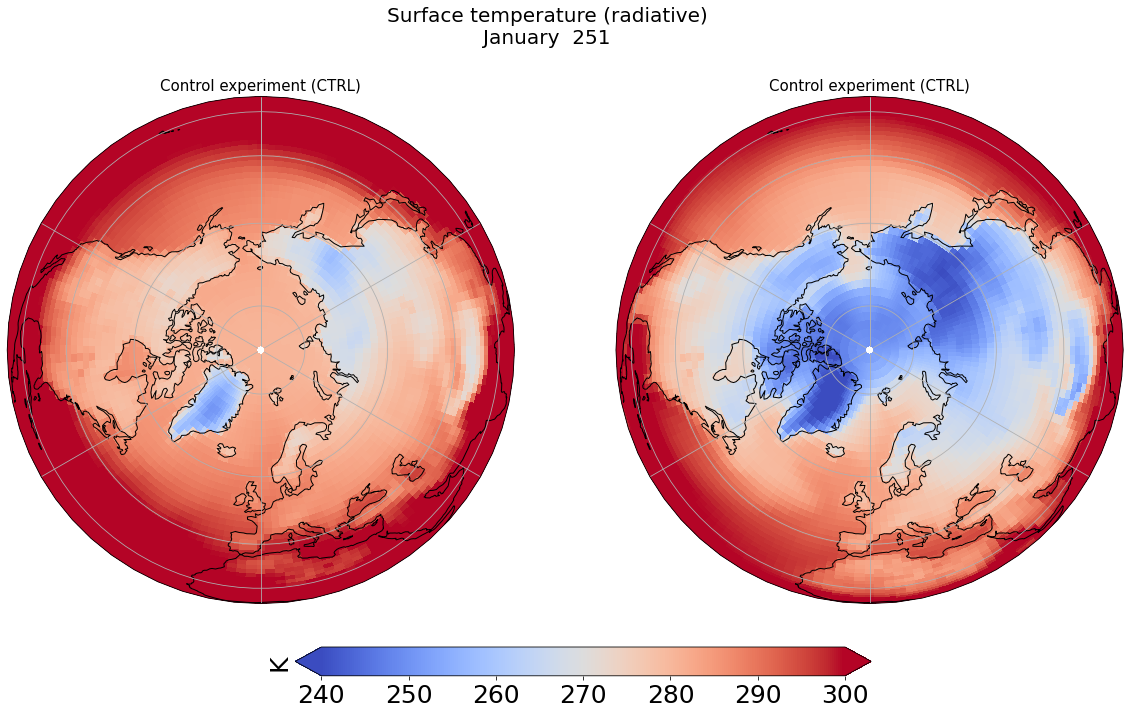

In [124]:
fig = plt.figure(1, figsize=[20,10])

tsel = 0 # select first date e.g. 1st January 251
# Fix extent
minval = 240
maxval = 300

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(0, 90))


# Plot 4xCO2 experiment
map_4xCO2 = data_4xCO2['TS'].isel(time=tsel).plot(ax=ax1, vmin=minval, vmax=maxval, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap='coolwarm', 
                                        add_colorbar=False)
ax1.set_title( "Control experiment (CTRL)" , fontsize=15)
ax1.coastlines()
ax1.gridlines()

# Plot Control 
map_ctrl = data_ctrl['TS'].isel(time=tsel).plot(ax=ax2, vmin=minval, vmax=maxval, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap='coolwarm', 
                                        add_colorbar=False)
ax2.set_title( "Control experiment (CTRL)" , fontsize=15)
ax2.coastlines()
ax2.gridlines()

# Title for both plots
fig.suptitle( data_ctrl.TS.attrs['long_name'] + '\n' + data_ctrl.time.values[tsel].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map_ctrl, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('K', fontsize=25)